# Problem 3 - Google Playstore Apps (63 pts)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('GooglePlaystore.xlsx')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up


## Preprocessing (28 pts)

1. [3 pts] Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.

In [8]:
print(df.index[df['Reviews'] == '3.0M'])
print(df.shape)

Int64Index([10472], dtype='int64')
(10841, 13)


In [9]:
df = df.drop(10472)
print(df.shape)

(10840, 13)


2. [4 pts] Remove rows where any of the columns has the value "Varies with device".

In [11]:
df.drop(df[df['Android Ver'] == 'Varies with device'].index, inplace = True)
df.drop(df[df['App'] == 'Varies with device'].index, inplace = True)
df.drop(df[df['Category'] == 'Varies with device'].index, inplace = True)
df.drop(df[df['Rating'] == 'Varies with device'].index, inplace = True)
df.drop(df[df['Reviews'] == 'Varies with device'].index, inplace = True)
df.drop(df[df['Size'] == 'Varies with device'].index, inplace = True)
df.drop(df[df['Installs'] == 'Varies with device'].index, inplace = True)
df.drop(df[df['Type'] == 'Varies with device'].index, inplace = True)
df.drop(df[df['Price'] == 'Varies with device'].index, inplace = True)
df.drop(df[df['Content Rating'] == 'Varies with device'].index, inplace = True)
df.drop(df[df['Genres'] == 'Varies with device'].index, inplace = True)
df.drop(df[df['Last Updated'] == 'Varies with device'].index, inplace = True)
df.drop(df[df['Current Ver'] == 'Varies with device'].index, inplace = True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3 and up


3. [5 pts] The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6". If there is a range (eg. 5.0 - 8.0), only consider the first number. For example, the value "5.0 - 8.0" should be changed to "5.0". The value "4.0.3 - 7.1.1" should be changed to "4.0".

In [12]:
import re
for index, row in df.iterrows():
    if type(row['Android Ver']) != float:
        if 'and up' in row['Android Ver']:
            string = row['Android Ver']
            res = re.sub('[^0-9\.]','',string)
            df.at[index,'Android Ver'] = res
        elif '-' in row['Android Ver']:
            string1 = row['Android Ver']
            split = string1.split('-')
            res1 = split[0]
            df.at[index,'Android Ver'] = res1
for index, row in df.iterrows():
    if type(row['Android Ver']) != float:
        string2 = row['Android Ver']
        res2 = '.'.join(string2.split('.')[:2])
        df.at[index,'Android Ver'] = res2
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3


In [13]:
df['Android Ver'] = df['Android Ver'].astype(float)

4. [5 pts] The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.

In [14]:
for index, row in df.iterrows():
    string1 = row['Installs']
    intval = re.sub('[^0-9]','',string1)
    final = int(intval)
    df.at[index,'Installs'] = final
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3


In [15]:
df['Installs'] = df['Installs'].astype(int)

5. [5 pts] For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.

In [20]:
df['Rating'].isnull().sum()

1416

In [21]:
catrating = {}
avgcat = {}
for index, row in df.iterrows():
    if row['Category'] in catrating:
        catrating[row['Category']].append(row['Rating'])
    else:
        catrating[row['Category']] = [row['Rating']]
for keys in catrating:
    lsum = 0
    length = 0
    for x in catrating[keys]:
        if not np.isnan(x):
            lsum += x
            length += 1
    avg = lsum/length
    avg = round(avg, 2)
    avgcat[keys] = avg
for index, row in df.iterrows():
    if np.isnan(row['Rating']) and row['Reviews'] < 100 and row['Installs'] < 50000:
        df = df.drop(index)
    elif np.isnan(row['Rating']):
        df.at[index,'Rating'] = avgcat[row['Category']]
print(df['Rating'].isnull().sum())

0


6. [6 pts] Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.

In [22]:
for index, row in df.iterrows():
    string3 = row['Size']
    if 'M' or 'm' in string3:
        res4 = re.sub('[^0-9]','',string3)
        if '.' in string3:
            res4 = res4 + '00000'
        else:
            res4 = res4 + '000000'
        df.at[index,'Size'] = res4
    if 'k' in string3:
        res5 = re.sub('[^0-9]','',string3)
        if '.' in string3:
            res5 = res5 + '00'
        else:
            res5 = res5 + '000'
        df.at[index, 'Size'] = res5
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3


In [23]:
df['Size'] = df['Size'].astype(int)

## Analysis (19 pts)

1. [4 pts] Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.

In [24]:
ratings = {}
for index, row in df.iterrows():
    if row['Category'] in ratings:
        ratings[row['Category']].append(row['Rating'])
    else:
        ratings[row['Category']] = [row['Rating']]
lengths = []
for keys in ratings:
    lengths.append(len(ratings[keys]))
for keys in ratings:
    if len(ratings[keys]) < 1611:
        while len(ratings[keys]) < 1611:
            ratings[keys].append(np.nan)
df1 = pd.DataFrame(ratings)
df1.describe()

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,SPORTS,TRAVEL_AND_LOCAL,TOOLS,PERSONALIZATION,PRODUCTIVITY,PARENTING,WEATHER,VIDEO_PLAYERS,NEWS_AND_MAGAZINES,MAPS_AND_NAVIGATION
count,59.000000,62.000000,40.000000,147.000000,246.000000,49.000000,210.000000,174.000000,110.000000,86.000000,...,248.000000,155.000000,633.000000,277.000000,232.000000,48.000000,49.000000,114.000000,171.000000,94.000000
mean,4.358644,4.146774,4.291750,4.320136,4.119187,4.154082,4.100952,3.957816,4.392636,4.145349,...,4.204839,4.029677,4.010616,4.322022,4.140690,4.347917,4.242857,4.029211,4.141637,4.004255
std,0.365322,0.569935,0.356175,0.453084,0.662586,0.550363,0.502624,0.664204,0.254395,0.291308,...,0.466767,0.556680,0.638232,0.368190,0.581525,0.397058,0.349404,0.593726,0.586858,0.556663
min,3.200000,2.100000,3.100000,2.700000,1.000000,2.800000,1.000000,1.000000,3.500000,3.000000,...,1.500000,2.200000,1.000000,2.500000,1.000000,3.100000,3.300000,1.800000,1.700000,1.900000
25%,4.100000,3.900000,4.075000,4.100000,3.825000,3.800000,3.900000,3.600000,4.300000,4.000000,...,4.000000,3.700000,3.800000,4.100000,4.000000,4.100000,4.000000,3.725000,3.950000,3.700000
50%,4.400000,4.250000,4.300000,4.400000,4.300000,4.400000,4.200000,4.100000,4.400000,4.200000,...,4.300000,4.200000,4.200000,4.400000,4.200000,4.400000,4.300000,4.200000,4.300000,4.200000
75%,4.700000,4.500000,4.525000,4.600000,4.500000,4.600000,4.400000,4.400000,4.600000,4.300000,...,4.500000,4.400000,4.400000,4.600000,4.500000,4.625000,4.500000,4.400000,4.500000,4.400000
max,5.000000,4.900000,4.900000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,4.700000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.800000,4.900000,5.000000,4.900000


2. [11 pts] Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns:

    a. Rating (gives top 3 most highly rated applications in each category)
    
    b. Installs (gives top 3 most installed applications in each category)
    
    c. Reviews (gives top 3 most reviewed applications in each category)

You don't need to do anything explicit to break ties.
Each of the returned dataframes have Category and App for the first two columns, and one of Rating (for a.), Installs (for b.), and Reviews (for c.) as the third column.

In [25]:
df2 = df[df['Type'] == 'Free']

In [26]:
def func1(col):
    dict1 = {}
    for index, row in df2.iterrows():
        if row['Category'] in dict1:
            dict1[row['Category']].append((row['App'],row[col]))
        else:
            dict1[row['Category']] = [(row['App'],row[col])]
    for keys in dict1:
        dict1[keys].sort(key = lambda x:x[1], reverse = True)
    for keys in dict1:
        dict1[keys] = dict1[keys][:3]
    data = []
    for keys in dict1:
        for x in dict1[keys]:
            data.append((keys,x[0],x[1]))
    df3 = pd.DataFrame(data, columns = ['Category', 'App', col])
    return df3
x = func1('Rating')
x

,Category,App,Rating
0,ART_AND_DESIGN,Spring flowers theme couleurs d t space,5.0
1,ART_AND_DESIGN,Harley Quinn wallpapers HD,4.8
2,ART_AND_DESIGN,Cardi B Wallpaper,4.8
3,AUTO_AND_VEHICLES,Tickets SDA 2018 and Exam from the State Traff...,4.9
4,AUTO_AND_VEHICLES,CDL Practice Test 2018 Edition,4.9
...,...,...,...
94,NEWS_AND_MAGAZINES,BI News,5.0
95,NEWS_AND_MAGAZINES,"Startupticker.ch News, Events",5.0
96,MAPS_AND_NAVIGATION,Tour BD (Bahir Dar Map),4.9
97,MAPS_AND_NAVIGATION,GPS Speedometer and Odometer,4.8


In [27]:
x = func1('Installs')
x

,Category,App,Installs
0,ART_AND_DESIGN,Tattoo Name On My Photo Editor,10000000
1,ART_AND_DESIGN,ibis Paint X,10000000
2,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",10000000
3,AUTO_AND_VEHICLES,AutoScout24 - used car finder,10000000
4,AUTO_AND_VEHICLES,Used cars for sale - Trovit,5000000
...,...,...,...
94,NEWS_AND_MAGAZINES,Google News,1000000000
95,NEWS_AND_MAGAZINES,Google News,1000000000
96,MAPS_AND_NAVIGATION,GPS Navigation & Offline Maps Sygic,50000000
97,MAPS_AND_NAVIGATION,"Yahoo! transit guide free timetable, operation...",10000000


In [28]:
x = func1('Reviews')
x

,Category,App,Reviews
0,ART_AND_DESIGN,ibis Paint X,224399
1,ART_AND_DESIGN,FlipaClip - Cartoon animation,194216
2,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",174531
3,AUTO_AND_VEHICLES,Tickets + PDA 2018 Exam,197136
4,AUTO_AND_VEHICLES,AutoScout24 - used car finder,186648
...,...,...,...
94,NEWS_AND_MAGAZINES,Google News,877643
95,NEWS_AND_MAGAZINES,Google News,877635
96,MAPS_AND_NAVIGATION,GPS Navigation & Offline Maps Sygic,1421884
97,MAPS_AND_NAVIGATION,Grab Driver,301413


3. [4 pts] Find the average, maximum and minimum price of the paid applications.

In [29]:
dfpaid = df[df['Type'] == 'Paid']
price = []
for index, row in dfpaid.iterrows():
    price.append(row['Price'])
average = sum(price) / len(price)
maximum = max(price)
minimum = min(price)
print('Average: ' + str(average))
print('Maximum: ' + str(maximum))
print('Minimum: ' + str(minimum))

Average: 15.139163763066062
Maximum: 400
Minimum: 0.99


## Visualization (16 pts)

1. [9 pts] In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’].

Count the number of applications per genre and display it using a pie chart.

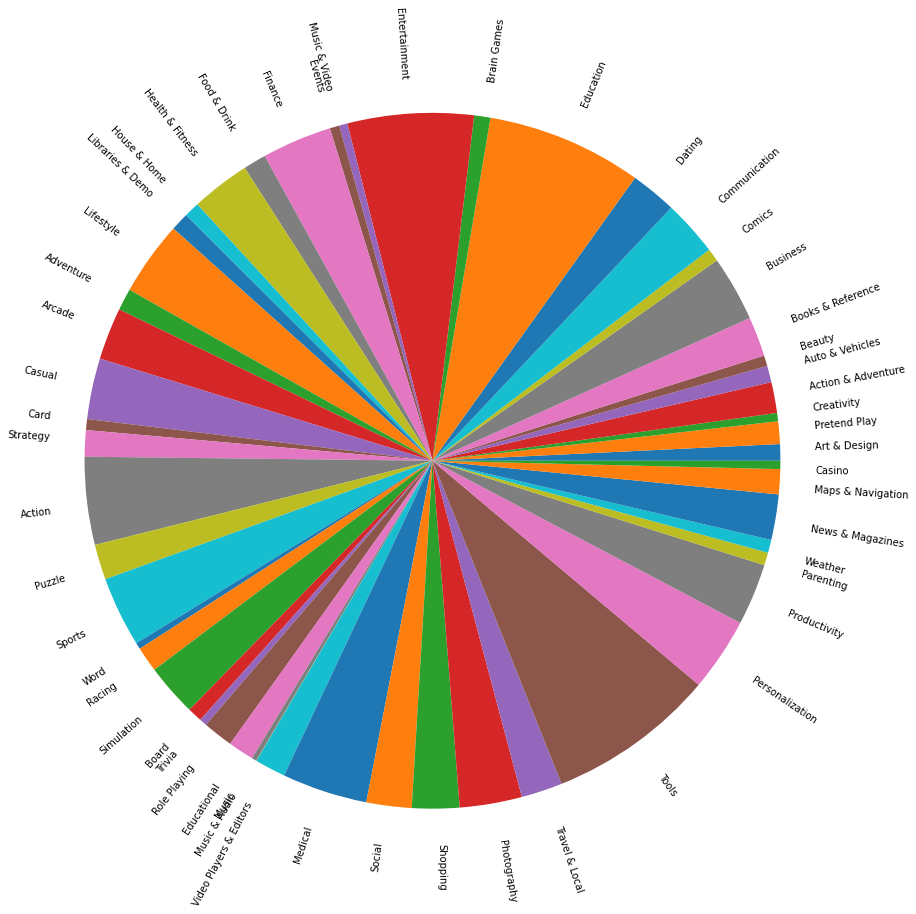

In [30]:
for index, row in df.iterrows():
    if ';' in row['Genres']:
        x = row['Genres'].split(';')
        df.at[index, 'Genres'] = x
genres = {}
for index, row in df.iterrows():
    if isinstance(row['Genres'], list):
        for x in row['Genres']:
            if x in genres:
                genres[x] += 1
            else:
                genres[x] = 1
    else:
        if row['Genres'] in genres:
            genres[row['Genres']] += 1
        else:
            genres[row['Genres']] = 1
genre = []
count = []
for x, y in genres.items():
    genre.append(x)
    count.append(y)
fig, ax = plt.subplots()
ax.pie(count, labels = genre, radius = 4, rotatelabels = True)
plt.show()

2. [7 pts] Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot.

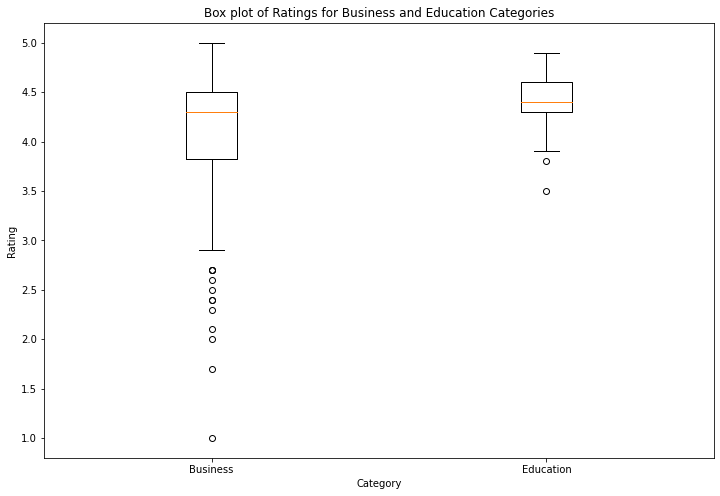

In [31]:
bus = []
edu = []
for index, row in df.iterrows():
    if row['Category'] == 'BUSINESS':
        bus.append(row['Rating'])
    if row['Category'] == 'EDUCATION':
        edu.append(row['Rating'])
dict5 = {'Business': bus, 'Education': edu}
fig, ax = plt.subplots(figsize = (12,8))
ax.boxplot(dict5.values())
ax.set_xticklabels(dict5.keys())
ax.set_xlabel('Category')
ax.set_ylabel('Rating')
ax.set_title('Box plot of Ratings for Business and Education Categories')
plt.show()